<a href="https://colab.research.google.com/github/Izzaladid197/EDA--on-various-Datasets/blob/main/EDA%20on%20Titanic%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of the dataset: (891, 12)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

First 5 Rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William

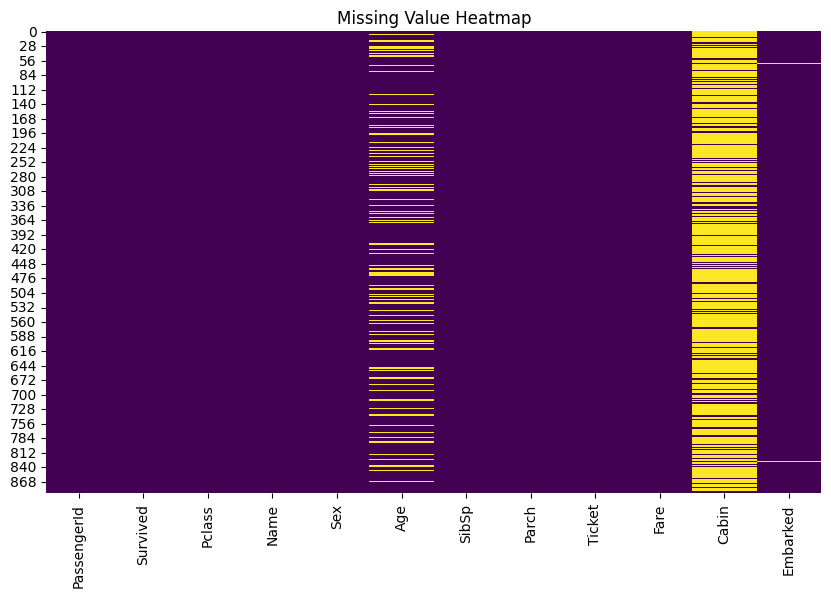

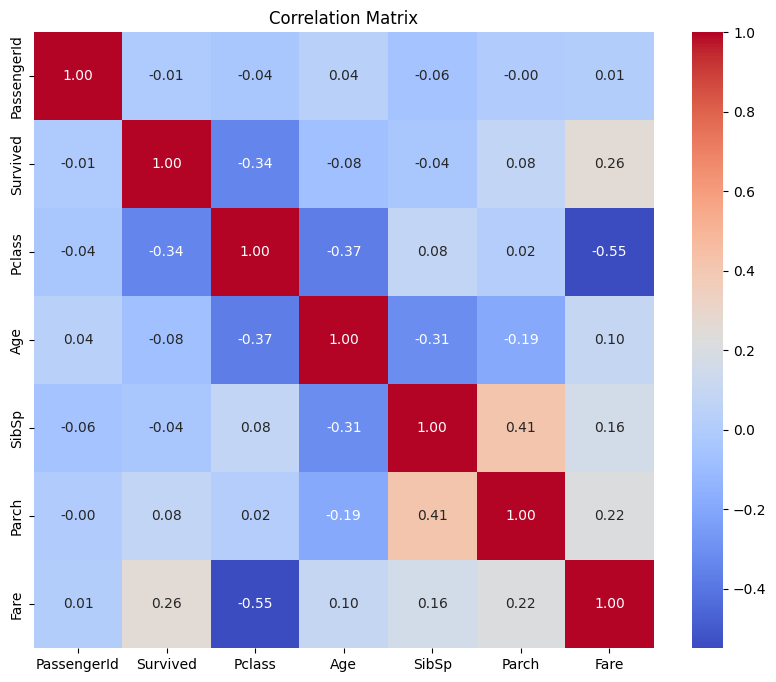

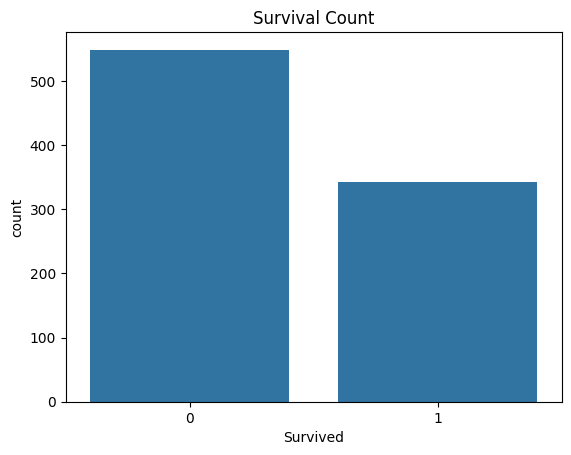

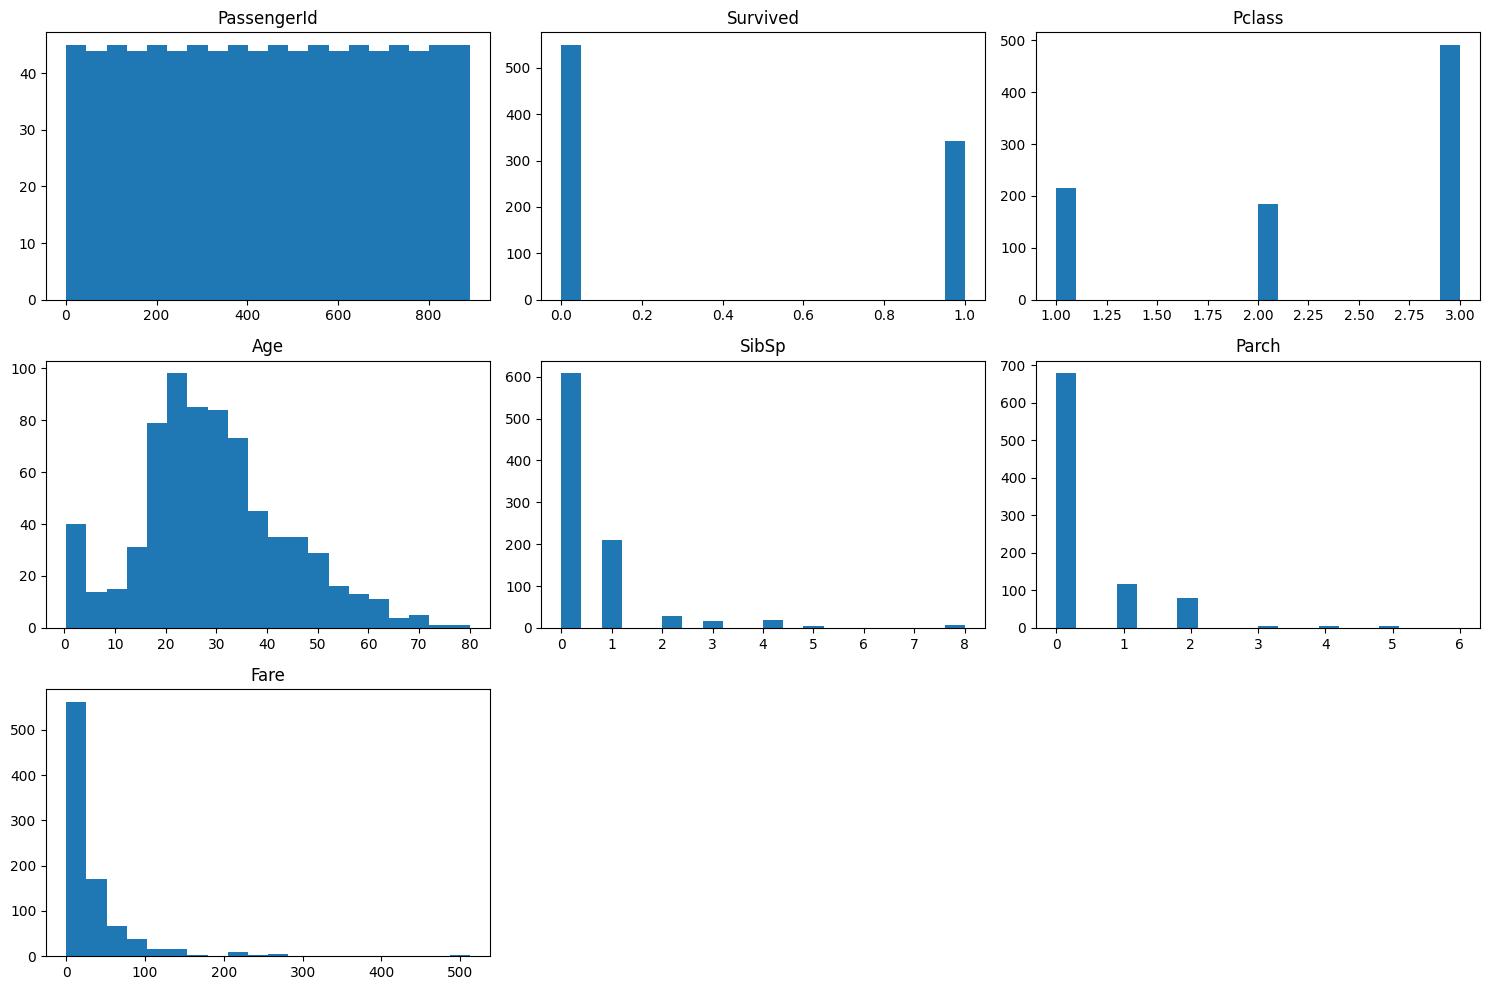

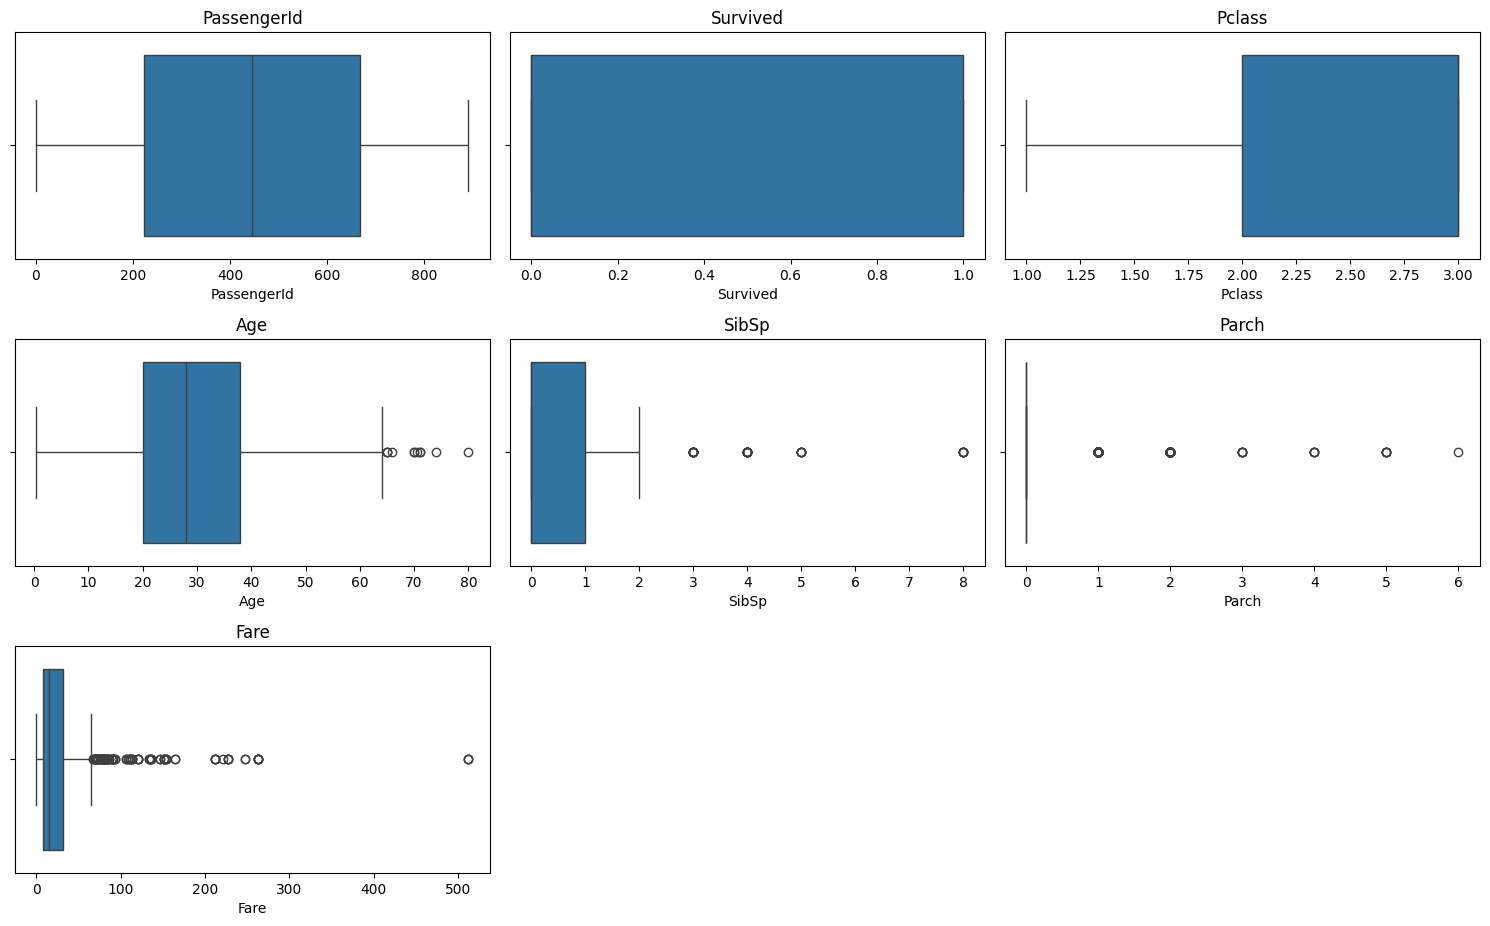

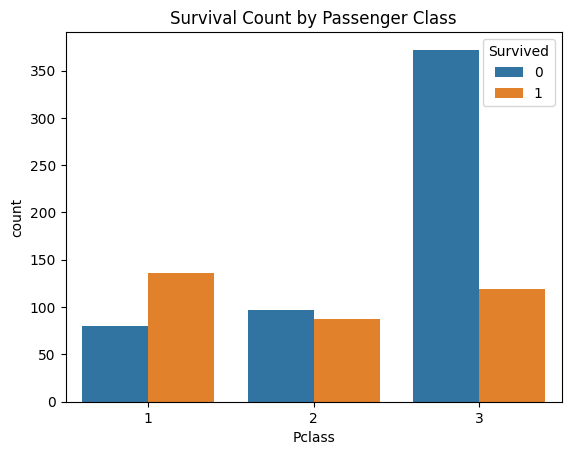

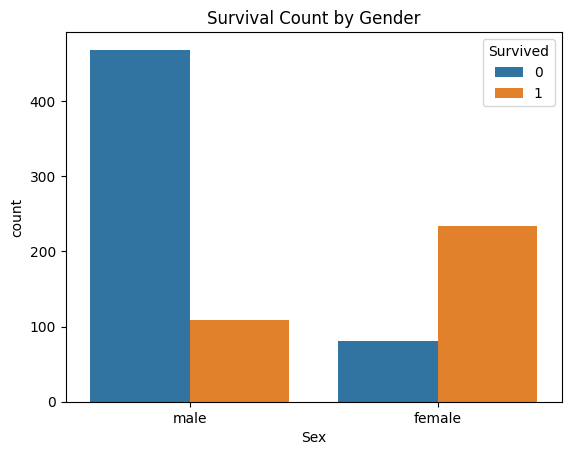

In [4]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Step 3: Basic Dataset Info
print("Shape of the dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe(include='all'))

# Step 4: Value Counts for Categorical Columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")

# Step 5: Visualize Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

# Step 6: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Step 7: Survival Countplot
if 'Survived' in df.columns:
    sns.countplot(x='Survived', data=df)
    plt.title("Survival Count")
    plt.show()

# Step 8: Distribution of Numerical Features
df.hist(bins=20, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()

# Step 9: Boxplots for Outliers
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[col], orient='h')
    plt.title(col)
plt.tight_layout()
plt.show()

# Step 10: Pairplot (Optional: Might take time)
# sns.pairplot(df, hue='Survived')
# plt.show()

# Step 11: Grouped Survival Analysis
if 'Survived' in df.columns and 'Pclass' in df.columns:
    sns.countplot(data=df, x='Pclass', hue='Survived')
    plt.title("Survival Count by Passenger Class")
    plt.show()

if 'Survived' in df.columns and 'Sex' in df.columns:
    sns.countplot(data=df, x='Sex', hue='Survived')
    plt.title("Survival Count by Gender")
    plt.show()
